## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Libraries imported sucessfully")

Libraries imported sucessfully


In [2]:
datatype = {
    "key": "object", "pickup_datetime":"object", "fare_amount": "float64", "pickup_longtitude": "float64",
    "pickup_datetime":"float64", "dropoff_longitude": "float64", "dropoff_latitude": "float64", "passenger_count":"int64"
}

df_raw = pd.read_csv("train.csv", low_memory=False, nrows=10**5,dtype=datatype, parse_dates=["pickup_datetime"])

df_raw.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df_raw.drop(['key'], axis=1, inplace=True)
df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### draw every other date input from pickup_datetime

In [4]:
import calendar

df_raw["pickup_date"] = df_raw["pickup_datetime"].dt.date
df_raw["pickup_day"] = df_raw["pickup_datetime"].apply(lambda x:x.day)
df_raw["pickup_hour"] = df_raw["pickup_datetime"].apply(lambda x:x.hour)
df_raw["pickup_day_of_week"] = df_raw["pickup_datetime"].apply(lambda x:calendar.day_name[x.weekday()])
df_raw["pickup_month"] = df_raw["pickup_datetime"].apply(lambda x:x.month)
df_raw["pickup_year"] = df_raw["pickup_datetime"].apply(lambda x:x.year)

df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


### Summary

* The minimum fare amount is negative.
* The min and max longtitude and latitude looks unreal, should be between -74 and 41.

* The passenger count is 0.

In [6]:
df_raw = df_raw[((df_raw["pickup_longitude"] > -78) & (df_raw["pickup_longitude"] < -70))
                &((df_raw["dropoff_longitude"] > -78) & (df_raw["pickup_longitude"] < -70))
                &((df_raw["pickup_latitude"] > 37) & (df_raw["pickup_latitude"] < 45))
                &((df_raw["dropoff_latitude"] > 37) & (df_raw["dropoff_latitude"]< 45))
                &((df_raw["passenger_count"] > 0)&(df_raw["fare_amount"] > 0))
                ]

df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000,48811.000000
mean,11.366994,-73.975140,40.750929,-73.963632,40.751502,1.674541,15.663580,13.482576,6.275983,2011.739813
std,9.662631,0.045041,0.038092,0.866573,0.038703,1.288578,8.659628,6.504347,3.461165,1.867665
min,0.010000,-75.423848,38.754215,-75.354559,39.604972,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736500,-73.991329,40.735894,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980478,40.754119,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968368,40.767776,-73.965316,40.768480,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,0.000000,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [7]:
df_raw.isna().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

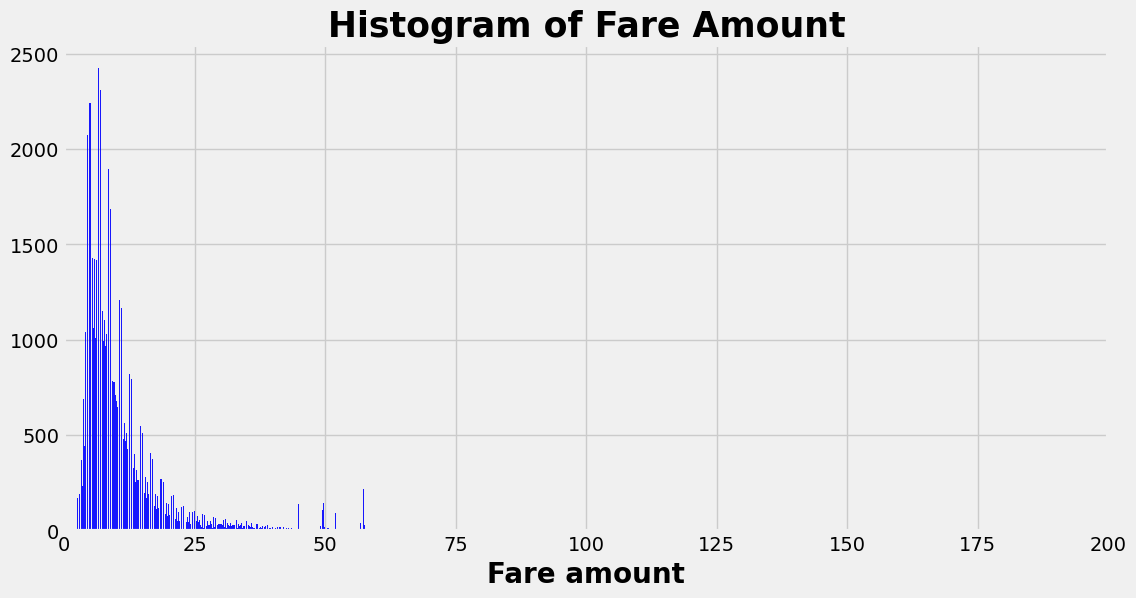

In [8]:
plt.figure(figsize = (12, 6))

plt.title("Histogram of Fare Amount", fontsize=25, fontweight="bold")
plt.xlabel("Fare amount", fontsize=20, fontweight="bold")
plt.xlim(0, 200)
n, bins, patches = plt.hist(df_raw.fare_amount,1000, facecolor="blue", alpha=0.9)
plt.show()



### check for normal distribution

Text(0.5, 1.0, 'Distribution of fare amount in Log Scale')

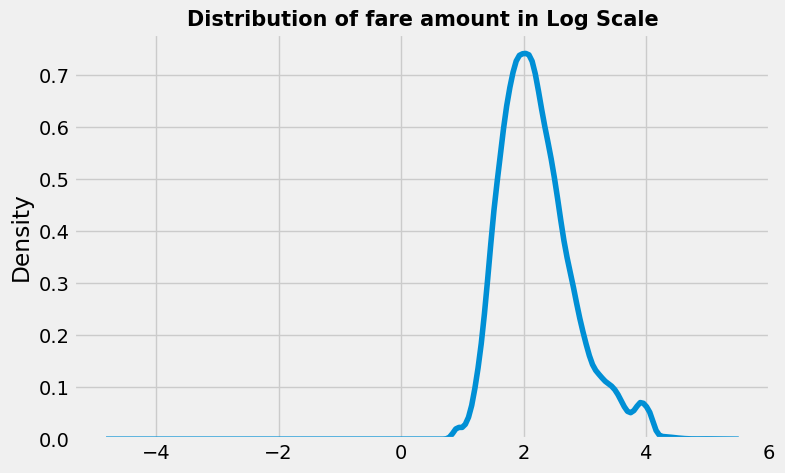

In [9]:
plt.figure(figsize=(8, 5))

sns.kdeplot(np.log(df_raw.fare_amount.values))\
.set_title("Distribution of fare amount in Log Scale", fontsize=15, fontweight="bold")

## Analyse top 5 fares

In [10]:
df_raw["fare_amount"].value_counts(normalize = True).iloc[:5]



fare_amount
6.5    0.049415
4.5    0.042183
8.5    0.038577
5.3    0.028805
6.1    0.028784
Name: proportion, dtype: float64

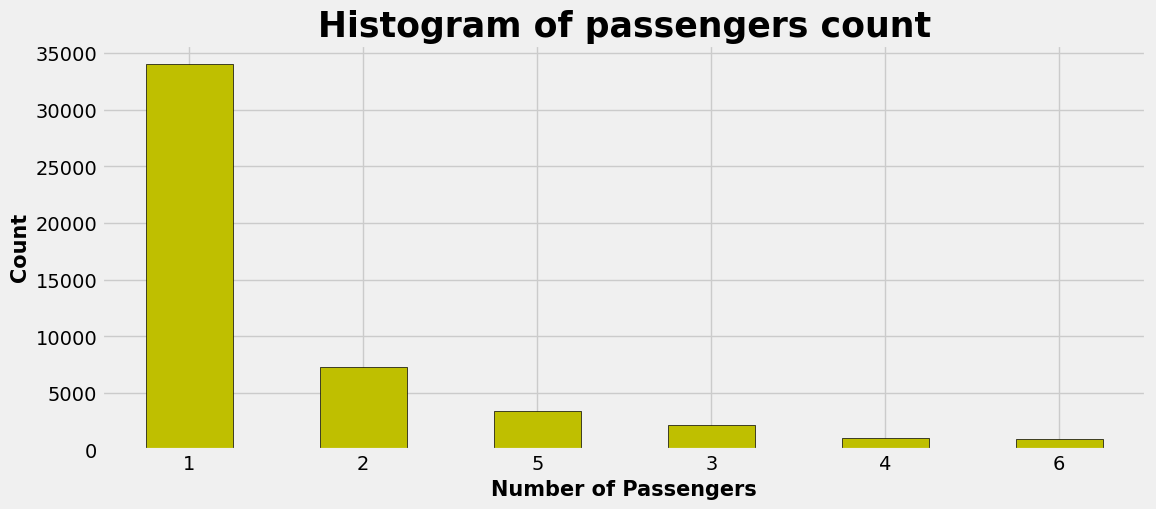

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [11]:
plt.figure(figsize=(12, 5))

df_raw.passenger_count.value_counts().plot.bar(color="y", edgecolor="k")
plt.title("Histogram of passengers count", fontsize=25, fontweight="bold")
plt.xlabel("Number of Passengers", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight="bold")
plt.xticks(rotation=0)
plt.show()

df_raw.head()

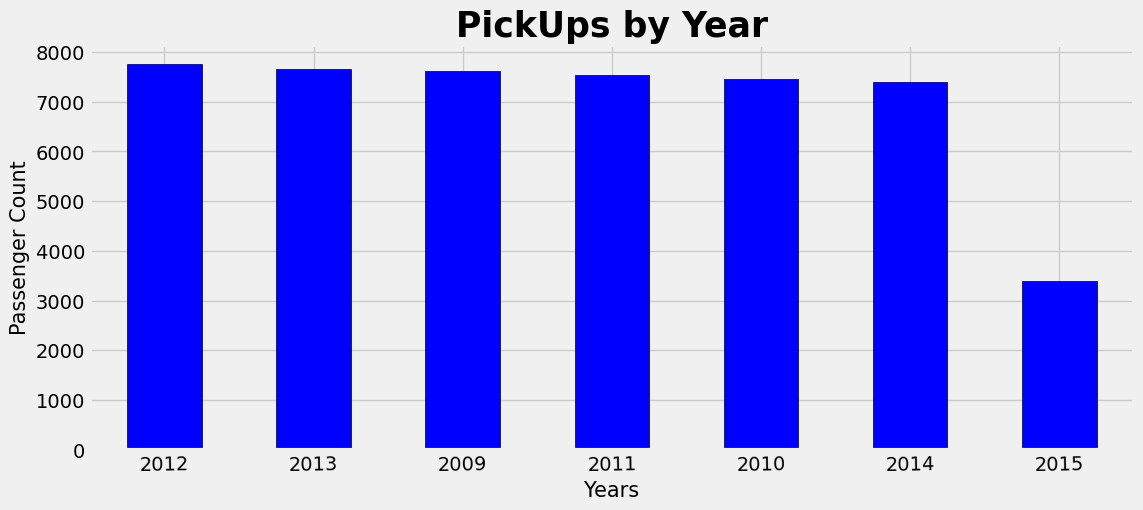

In [12]:
plt.figure(figsize=(12, 5))

df_raw.pickup_year.value_counts().plot.bar(color="b", edgecolor="k")
plt.title("PickUps by Year", fontsize=25, fontweight="bold")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Passenger Count", fontsize=15)
plt.xticks(rotation=1)
plt.show()

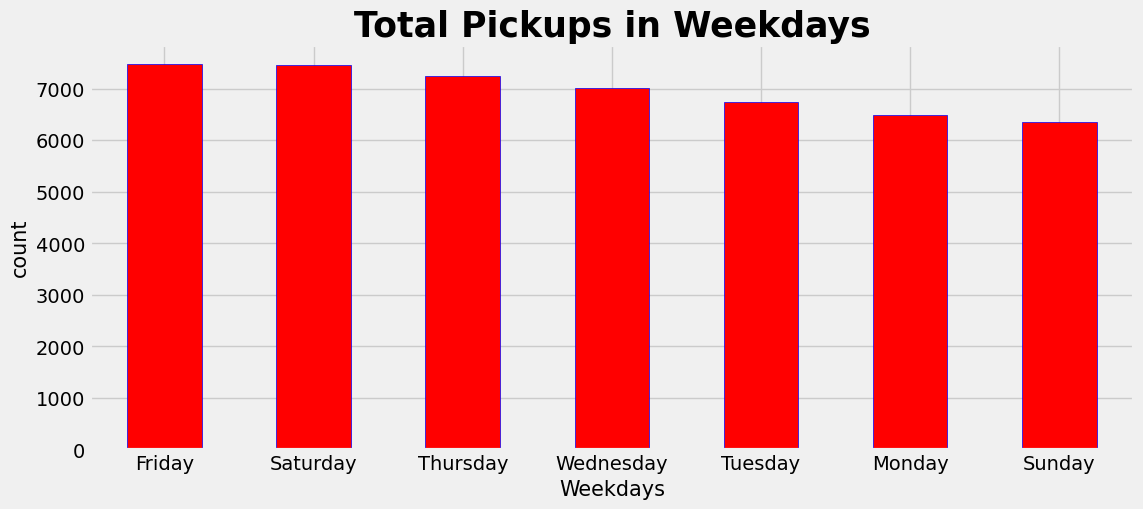

In [13]:
plt.figure(figsize=(12, 5))

df_raw.pickup_day_of_week.value_counts().plot.bar(color="r", edgecolor="b")
plt.title("Total Pickups in Weekdays", fontsize=25, fontweight="bold")
plt.xlabel("Weekdays", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(rotation=0)

plt.show()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


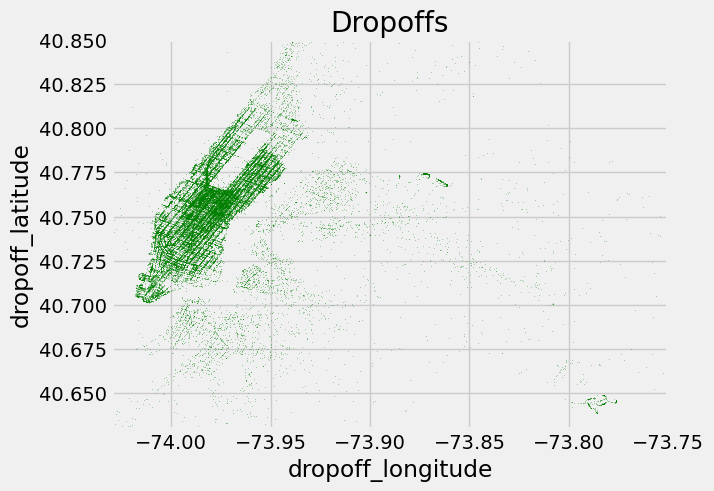

In [14]:
#plot heatmaps of pickups and dropoffs between within NewYork

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df_raw.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude",
           color="green", s=.02, alpha=0.7)

plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

df_raw.head()

(40.63, 40.85)

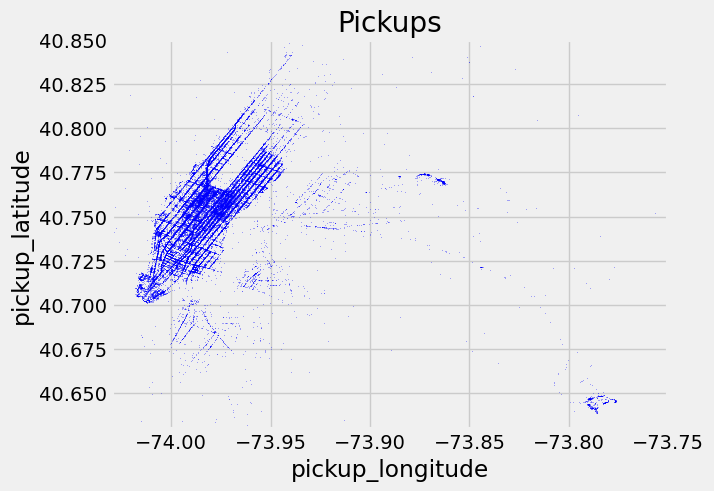

In [15]:
df_raw.plot(kind="scatter" , x="pickup_longitude", y="pickup_latitude", color="blue", s=.02, alpha=.75)

plt.title("Pickups")

plt.xlim(city_long_border)
plt.ylim(city_lat_border)


### calculate the distance around a sphere

In [16]:
def distance(lat1, lon1, lat2, lon2):
        p = 0.017453292519943295 # pi/180
        a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
        return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# add new column to dataframe with distance in miles
df_raw["distance_miles"] = distance(df_raw.pickup_latitude, df_raw.pickup_longitude, df_raw.dropoff_latitude, df_raw.dropoff_longitude)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


(0.0, 500.0)

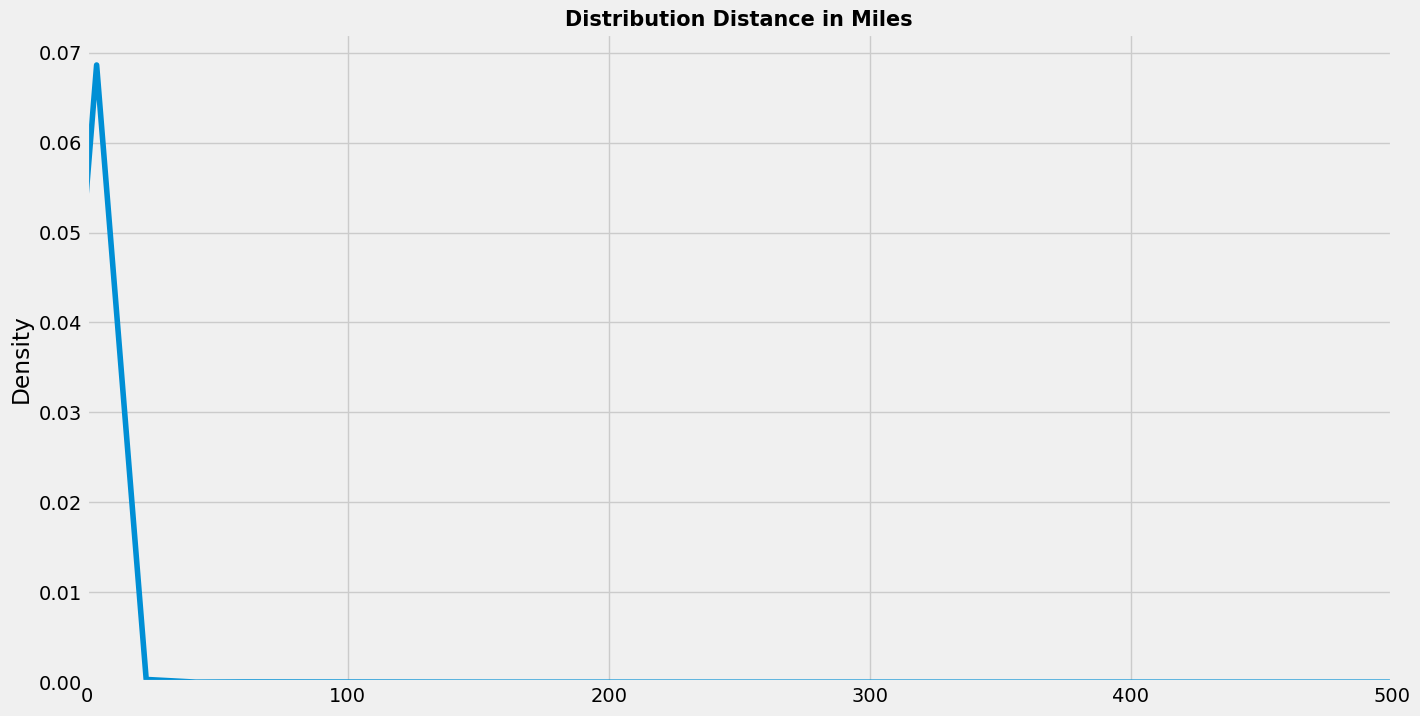

In [17]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df_raw["distance_miles"].values).set_title("Distribution Distance in Miles", fontsize=15, fontweight="bold")
plt.xlim(0, 500)

In [18]:
import folium

Pickup_Locations = folium.Map(location=[40.767937, -73.982155], tiles="OpenStreetMap", zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]["pickup_latitude"], each[1]["pickup_longitude"]],
                       radius=3,
                       color="blue",
                       popup=str(each[1]["pickup_latitude"])+ ',' + str(each[1]["pickup_longitude"]),
                       fill_color="#FD8A6C").add_to(Pickup_Locations)
Pickup_Locations

In [19]:
Dropoff_Locations = folium.Map(location=[40.767937, -73.982155], tiles="OpenStreetMap", zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]["dropoff_latitude"], each[1]["dropoff_longitude"]],
                       radius = 3,
                       color="red",
                       popup = str(each[1]["dropoff_latitude"]) + "," +str(each[1]["dropoff_longitude"]),
                       fill_color="#AE4565").add_to(Dropoff_Locations)

Dropoff_Locations

In [41]:
df_final = df_raw.copy()


df_final.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [21]:
#Imputing Categorical Variables
Variables = {"Monday":1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
year = {2009: 1, 2010:2, 2011: 3, 2012: 4, 2013: 5, 2014: 6, 2015: 7}

df_final["pickup_year"] = df_final["pickup_year"].map(year)
df_final["pickup_day_of_week"] = df_final["pickup_day_of_week"].map(Variables)
df_final.drop(["pickup_datetime", "pickup_date"], axis=1, inplace=True)
df_final

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242218
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,12,23,3,6,5,3.069806
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,22,17,1,6,7,0.543517
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,30,4,7,1,3,1.406341
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,6,7,2,11,4,0.413364


## training the data

In [30]:
from sklearn.model_selection import train_test_split

X = df_final.drop(["fare_amount"], axis=1)
y = df_final[["fare_amount"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (34167, 11)
X_test (14644, 11)
y_train (34167, 1)
y_test (14644, 1)


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred)**0.5)

Test RMSE: 9.515


# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test RMSE:  %.3f" % mean_squared_error(y_test, y_pred)**0.5)


Test RMSE:  4.415


In [38]:
# save the trained model as a pickle string

import pickle

pickle.dump(rf, open('rf', 'wb'))

## Final Application

In [40]:
import folium 

Enter_Coordinates = folium.Map(location=[40.767937, -73.982155], tiles="OpenStreetMap", zoom_start=12)

popup=folium.LatLngPopup()
popup = folium.ClickForMarker()

Enter_Coordinates.add_child(popup)
Enter_Coordinates
                               


In [45]:
Pickup_Finder = folium.Map(location=[40.767937, -73.982155], tiles= "OpenStreetMap", zoom_start=12)


Pickup = [40.744075, -74.003197]
Drop_off = [40.7616, -73.9734]

points = []
for i in range(len(Pickup)):
    points.append([Pickup[i], Drop_off[i]])
    
print("Distance Between Pickup and Drop-off in miles :", distance(Pickup[0], Pickup[1], Drop_off[0], Drop_off[1]))

folium.CircleMarker(Pickup, radius=5, color='blue', popup=str([Pickup[0], Pickup[1]]),
                    fill_color='#fd8a6c').add_to(Pickup_Finder)

folium.CircleMarker(Drop_off, radius = 5, color="red", popup=str([Drop_off[0], Drop_off[1]]),
                   fill_color="#fd8a6c").add_to(Pickup_Finder)


for index, lat in enumerate(Pickup):
    folium.Marker([lat, Drop_off[index]],
                 icon= folium.Icon(color="green", icon="plus")).add_to(Pickup_Finder)
    

folium.PolyLine([Pickup, Drop_off], color="green", weight=3, opacity=5).add_to(Pickup_Finder)

Pickup_Finder


    
    

Distance Between Pickup and Drop-off in miles : 1.9744617137237859


In [49]:
print("Enter Your Information to Predict Fare: ")

Pickup_Coordinates = str(input("Enter PickUp Coordiantes: "))
Drop_off_Coordinates = str(input("Enter Dropoff Coordiantes: "))

pickup_latitude = float(Pickup_Coordinates.split(',')[0])
pickup_longitude = float(Pickup_Coordinates.split(',')[1])


dropoff_latitude = float(Drop_off_Coordinates.split(',')[0])
dropoff_longitude = float(Drop_off_Coordinates.split(',')[1])

Enter_Date = input("Enter Date (DD/MM/YEAR)")

passenger_count = int(input("Enter Number of Passengers: "))


pickup_day = int(Enter_Date.split("/")[0])
pickup_hour = int(input("Enter hour: "))

pickup_day_of_week = int(input("Enter Week: "))

pickup_month = int(Enter_Date.split("/")[1])
pickup_year = int(Enter_Date.split("/")[2])


distance_miles = distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)

my_array = np.array([pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, passenger_count, pickup_day, pickup_hour, pickup_day_of_week, pickup_month, pickup_year, distance_miles])

print("Fare amount ($) : ", rf.predict(my_array.reshape(1, -1)))

Enter Your Information to Predict Fare: 
Enter PickUp Coordiantes: 23, 43
Enter Dropoff Coordiantes: 12, -56
Enter Date (DD/MM/YEAR)12/12/2024
Enter Number of Passengers: 3
Enter hour: 4
Enter Week: 2
Fare amount ($) :  [22.67385483]


# GUI

In [1]:
import tkinter as tk
from tkinter import StringVar, Entry, Label, Button
import pandas as pd
import numpy as np

window = tk.Tk()
window.title("New York Taxi Prediction by Barnabas")
window.geometry("400x400")

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  # pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

def predict_fare():
    pickup_coords = pickup_value.get().split(',')
    dropoff_coords = dropoff_value.get().split(',')
    pickup_latitude = float(pickup_coords[0])
    pickup_longitude = float(pickup_coords[1])
    dropoff_latitude = float(dropoff_coords[0])
    dropoff_longitude = float(dropoff_coords[1])
    passenger_count = int(passengers_value.get())
    date = date_value.get().split('/')
    pickup_day = int(date[0])
    pickup_month = int(date[1])
    pickup_year = int(date[2])
    pickup_hour = int(hour_value.get())
    pickup_week = int(week_value.get())
    distance_miles = distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)
    my_array = np.array([pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, passenger_count, pickup_day, pickup_hour, pickup_week, pickup_month, pickup_year, distance_miles])
    predicted_fare = rf.predict(my_array.reshape(1, -1))
    result_label.config(text=f"Fare amount ($): {predicted_fare[0]}")

l1 = Label(window, text="Pickup Coordinates", padx=5, pady=5)
l1.grid(row=1, column=1)
pickup_value = StringVar()
entry1 = Entry(window, textvariable=pickup_value)
entry1.grid(row=1, column=2)

l2 = Label(window, text="Dropoff Coordinates", padx=5, pady=5)
l2.grid(row=2, column=1)
dropoff_value = StringVar()
entry2 = Entry(window, textvariable=dropoff_value)
entry2.grid(row=2, column=2)

l3 = Label(window, text="Enter Date (DD/MM/YEAR)", padx=5, pady=5)
l3.grid(row=3, column=1)
date_value = StringVar()
entry3 = Entry(window, textvariable=date_value)
entry3.grid(row=3, column=2)

l4 = Label(window, text="No of Passengers", padx=5, pady=5)
l4.grid(row=4, column=1)
passengers_value = StringVar()
entry4 = Entry(window, textvariable=passengers_value)
entry4.grid(row=4, column=2)

l5 = Label(window, text="Enter Hour", padx=5, pady=5)
l5.grid(row=5, column=1)
hour_value = StringVar()
entry5 = Entry(window, textvariable=hour_value)
entry5.grid(row=5, column=2)

l6 = Label(window, text="Enter Week", padx=5, pady=5)
l6.grid(row=6, column=1)
week_value = StringVar()
entry6 = Entry(window, textvariable=week_value)
entry6.grid(row=6, column=2)

predict_button = Button(window, text="Predict Fare", command=predict_fare)
predict_button.grid(row=7, column=2)

result_label = Label(window, text="", padx=5, pady=5)
result_label.grid(row=8, column=2)

# Button to clear result
clear_button = tk.Button(window, text="Clear Result", command=lambda: result_text.delete('1.0', tk.END))
clear_button.grid(row=11, column=3)

window.mainloop()
